# Découverte de PVDAQ - Farm Solar Array - 2024

In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# On a récupéré le dataset PVDAQ pour le système Farm Solar Array pour l'année 2024
# https://openei.org/wiki/PVDAQ/Sites/Farm_Solar_Array

df_elec1 = pd.read_csv("pvdaq_data_2024/2107_electrical_data_2024.csv", parse_dates=['measured_on'])
df_env1  = pd.read_csv("pvdaq_data_2024/2107_environment_data_2024.csv", parse_dates=['measured_on'])
df_irr1  = pd.read_csv("pvdaq_data_2024/2107_irradiance_data_2024.csv", parse_dates=['measured_on'])
df_meter1 = pd.read_csv("pvdaq_data_2024/2107_meter_15m_data_2024.csv", parse_dates=['measured_on'])

df_elec2 = pd.read_csv("pvdaq_data_2017_a_2023/2107_electrical_data_v1.csv", parse_dates=['measured_on'])
df_env2  = pd.read_csv("pvdaq_data_2017_a_2023/2107_environment_data.csv", parse_dates=['measured_on'])
df_irr2  = pd.read_csv("pvdaq_data_2017_a_2023/2107_irradiance_data.csv", parse_dates=['measured_on'])
df_meter2 = pd.read_csv("pvdaq_data_2017_a_2023/2107_meter_15m_data.csv", parse_dates=['measured_on'])

# Concaténation
df_elec = pd.concat([df_elec2, df_elec1], ignore_index=True)
df_env = pd.concat([df_env2, df_env1], ignore_index=True)
df_irr = pd.concat([df_irr2, df_irr1], ignore_index=True)
df_meter = pd.concat([df_meter2, df_meter1], ignore_index=True)

In [3]:
df_elec.head()

,measured_on,inv_01_dc_current_inv_149579,inv_01_dc_voltage_inv_149580,inv_01_ac_current_inv_149581,inv_01_ac_voltage_inv_149582,inv_01_ac_power_inv_149583,inv_02_dc_current_inv_149584,inv_02_dc_voltage_inv_149585,inv_02_ac_current_inv_149586,inv_02_ac_voltage_inv_149587,...,inv_23_dc_voltage_inv_149690,inv_23_ac_current_inv_149691,inv_23_ac_voltage_inv_149692,inv_23_ac_power_inv_149693,inv_24_dc_current_inv_149694,inv_24_dc_voltage_inv_149695,inv_24_ac_current_inv_149696,inv_24_ac_voltage_inv_149697,inv_24_ac_power_inv_149698,inv_05_dc_voltage_inv_149600
0,2017-11-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2017-11-01 00:05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2017-11-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,2017-11-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,2017-11-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [4]:
df_env.head()

,measured_on,ambient_temperature_o_149575,wind_speed_o_149576,wind_direction_o_149577
0,2017-12-01 00:00:00,38.8,1.2,156.0
1,2017-12-01 00:15:00,38.8,1.2,156.0
2,2017-12-01 00:30:00,38.8,1.2,156.0
3,2017-12-01 00:45:00,38.8,1.2,156.0
4,2017-12-01 01:00:00,37.0,2.6,247.0


In [5]:
df_irr.head()

,measured_on,poa_irradiance_o_149574
0,2017-11-01 07:10:00,0.0
1,2017-11-01 07:15:00,0.0
2,2017-11-01 07:20:00,0.0
3,2017-11-01 07:25:00,0.0
4,2017-11-01 09:00:00,267.5


In [6]:
df_meter.head()

,measured_on,meter_revenue_grade_ac_output_meter_149578
0,2017-01-01 00:15:00,0.0
1,2017-01-01 00:30:00,0.0
2,2017-01-01 00:45:00,0.0
3,2017-01-01 01:00:00,0.0
4,2017-01-01 01:15:00,0.0


#### Nettoyage des identifiants des capteurs à la fin des noms des colonnes pour plus de clarté.

In [7]:
def clean_column_name(col):
    # supprime _inv_XXXXX ou _o_XXXXX
    return re.sub(r"_(inv|o|meter)_[0-9]+$", "", col)

df_elec.columns = [clean_column_name(c) for c in df_elec.columns]
df_env.columns = [clean_column_name(c) for c in df_env.columns]
df_irr.columns = [clean_column_name(c) for c in df_irr.columns]
df_meter.columns = [clean_column_name(c) for c in df_meter.columns]

print(df_elec.columns)
print(df_env.columns)
print(df_irr.columns)
print(df_meter.columns)


Index(['measured_on', 'inv_01_dc_current', 'inv_01_dc_voltage',
       'inv_01_ac_current', 'inv_01_ac_voltage', 'inv_01_ac_power',
       'inv_02_dc_current', 'inv_02_dc_voltage', 'inv_02_ac_current',
       'inv_02_ac_voltage',
       ...
       'inv_23_dc_voltage', 'inv_23_ac_current', 'inv_23_ac_voltage',
       'inv_23_ac_power', 'inv_24_dc_current', 'inv_24_dc_voltage',
       'inv_24_ac_current', 'inv_24_ac_voltage', 'inv_24_ac_power',
       'inv_05_dc_voltage'],
      dtype='object', length=121)
Index(['measured_on', 'ambient_temperature', 'wind_speed', 'wind_direction'], dtype='object')
Index(['measured_on', 'poa_irradiance'], dtype='object')
Index(['measured_on', 'meter_revenue_grade_ac_output'], dtype='object')


#### On merge les 4 dataset ensemble

On convertit les colonnes "measured_on" en datetime ce qui permet un merge exact et on garde seulement les timestamps communs à tous les datasets.

In [8]:
for df in [df_elec, df_env, df_irr, df_meter]:
    df['measured_on'] = pd.to_datetime(df['measured_on'])

In [9]:
merged = df_elec.merge(df_env, on='measured_on', how='inner') \
            .merge(df_irr, on='measured_on', how='inner') \
            .merge(df_meter, on='measured_on', how='inner')

## **Exploration du dataset mergé**

In [10]:
merged.head()

,measured_on,inv_01_dc_current,inv_01_dc_voltage,inv_01_ac_current,inv_01_ac_voltage,inv_01_ac_power,inv_02_dc_current,inv_02_dc_voltage,inv_02_ac_current,inv_02_ac_voltage,...,inv_24_dc_voltage,inv_24_ac_current,inv_24_ac_voltage,inv_24_ac_power,inv_05_dc_voltage,ambient_temperature,wind_speed,wind_direction,poa_irradiance,meter_revenue_grade_ac_output
0,2017-12-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,38.8,1.2,156.0,0.0,0.0
1,2017-12-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,37.0,2.6,247.0,0.0,0.0
2,2017-12-01 01:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,37.0,2.6,247.0,0.0,0.0
3,2017-12-01 01:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,37.0,2.6,247.0,0.0,0.0
4,2017-12-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,37.5,1.9,265.0,0.0,0.0


In [11]:
print(merged.dtypes)

measured_on                      datetime64[ns]
inv_01_dc_current                       float64
inv_01_dc_voltage                       float64
inv_01_ac_current                       float64
inv_01_ac_voltage                       float64
                                      ...      
ambient_temperature                     float64
wind_speed                              float64
wind_direction                          float64
poa_irradiance                          float64
meter_revenue_grade_ac_output           float64
Length: 126, dtype: object


In [12]:
print(merged.shape)

(199711, 126)


In [13]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199711 entries, 0 to 199710
Columns: 126 entries, measured_on to meter_revenue_grade_ac_output
dtypes: datetime64[ns](1), float64(125)
memory usage: 192.0 MB


In [14]:
merged.describe()

,measured_on,inv_01_dc_current,inv_01_dc_voltage,inv_01_ac_current,inv_01_ac_voltage,inv_01_ac_power,inv_02_dc_current,inv_02_dc_voltage,inv_02_ac_current,inv_02_ac_voltage,...,inv_24_dc_voltage,inv_24_ac_current,inv_24_ac_voltage,inv_24_ac_power,inv_05_dc_voltage,ambient_temperature,wind_speed,wind_direction,poa_irradiance,meter_revenue_grade_ac_output
count,199711,199711.000000,199711.000000,199711.000000,199711.00000,199711.000000,199711.000000,199711.000000,199711.000000,199711.000000,...,199711.000000,199711.000000,199711.000000,199711.000000,24391.000000,199580.000000,199695.000000,199703.000000,199711.000000,199711.000000
mean,2021-04-02 17:11:27.283624448,11.746963,374.509008,8.844126,160.33289,7.545081,11.040920,371.208704,8.339900,159.173965,...,381.964213,8.650573,163.534551,7.395053,421.243825,63.591876,5.701643,182.215397,268.612198,180.572732
min,2017-12-01 00:15:00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,23.400000,1.000000,0.000000,0.000000,0.000000
25%,2019-07-04 16:52:30,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,51.500000,2.900000,120.000000,0.000000,0.000000
50%,2021-02-28 10:45:00,1.200000,612.634000,1.339000,279.06700,0.315000,0.447000,598.655000,1.059000,279.632000,...,608.976000,1.420000,279.779000,0.110000,614.169000,62.300000,4.400000,153.000000,38.200000,17.280000
75%,2022-12-15 14:37:30,22.907500,682.601500,17.754000,287.11600,15.188000,20.892000,681.457000,16.327000,287.848000,...,687.603000,17.098000,286.894000,14.718500,672.739500,75.100000,7.300000,262.000000,546.600000,381.440000
max,2024-11-01 23:15:00,52.160000,909.840000,36.338000,310.67700,30.085000,54.844000,1750.755000,35.907000,310.436000,...,912.795000,35.848000,310.605000,30.089000,851.387000,115.600000,30.900000,360.000000,1400.000000,1783.680000
std,NaN,16.123177,334.581506,11.883779,142.14886,10.400228,15.801546,334.134676,11.564696,142.679477,...,335.311388,11.798319,141.548783,10.384771,314.551821,15.687559,4.013714,98.294213,348.407287,234.373358


Valeurs manquantes

In [15]:
missing = merged.isna().sum()
missing = missing[missing > 0]

print(missing)


inv_05_dc_voltage      175320
ambient_temperature       131
wind_speed                 16
wind_direction              8
dtype: int64


In [16]:
print("Plage des dates où les mesures ont été réalisées")
print(merged['measured_on'].min())
print(merged['measured_on'].max())


print("\nNombre de points par jours en moyenne")
daily_counts = merged['measured_on'].dt.date.value_counts().sort_index()
print(np.average(daily_counts))

Plage des dates où les mesures ont été réalisées
2017-12-01 00:15:00
2024-11-01 23:15:00

Nombre de points par jours en moyenne
83.4563309653155


Total DC I, V and power

In [17]:
merged["I_dc_total"] = merged.filter(like="_dc_current").sum(axis=1)
merged["V_dc_avg"]   = merged.filter(like="_dc_voltage").mean(axis=1)


V = merged.filter(like="_dc_voltage")
I = merged.filter(like="_dc_current")

merged["P_dc_total"] = (V.values * I.values).sum(axis=1)


Total AC I, V and power

In [18]:
merged["I_ac_total"] = merged.filter(like="_ac_current").sum(axis=1)
merged["V_ac_total"] = merged.filter(like="_ac_voltage").mean(axis=1)

ac_cols = [col for col in merged.columns if 'ac_power' in col]
merged['P_ac_total'] = merged[ac_cols].sum(axis=1)
merged.head()

,measured_on,inv_01_dc_current,inv_01_dc_voltage,inv_01_ac_current,inv_01_ac_voltage,inv_01_ac_power,inv_02_dc_current,inv_02_dc_voltage,inv_02_ac_current,inv_02_ac_voltage,...,wind_speed,wind_direction,poa_irradiance,meter_revenue_grade_ac_output,I_dc_total,V_dc_avg,P_dc_total,I_ac_total,V_ac_total,P_ac_total
0,2017-12-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.2,156.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
1,2017-12-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.6,247.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
2,2017-12-01 01:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.6,247.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
3,2017-12-01 01:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.6,247.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
4,2017-12-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.9,265.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0


In [19]:
cols_of_interest = [
    "measured_on",
    "poa_irradiance",
    "wind_speed",
    "wind_direction",
    "ambient_temperature",
    "meter_revenue_grade_ac_output",
    "P_dc_total",
    "I_dc_total",
    "V_dc_avg",
    "P_ac_total",
    "I_ac_total",
    "V_ac_total",
]

df = merged[cols_of_interest].copy()

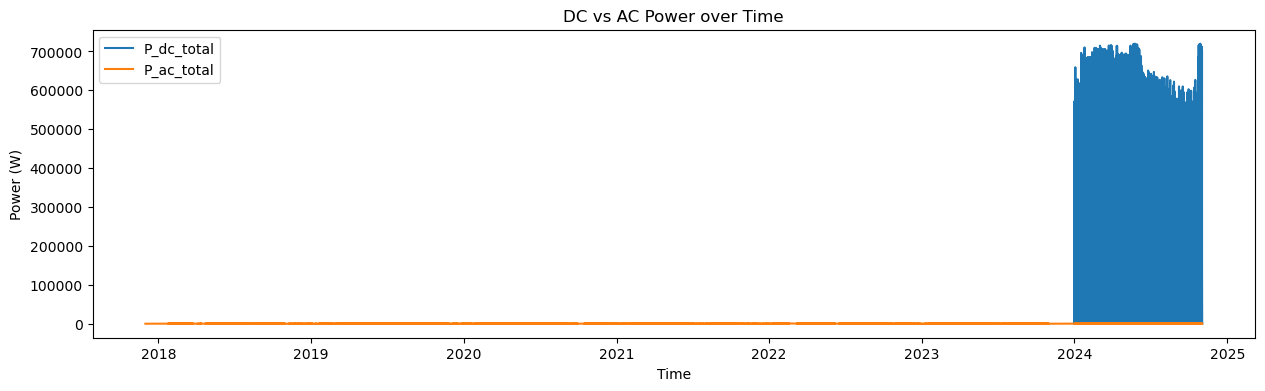

In [20]:
plt.figure(figsize=(15,4))
plt.plot(df["measured_on"], df["P_dc_total"], label="P_dc_total")
plt.plot(df["measured_on"], df["P_ac_total"], label="P_ac_total")
plt.legend()
plt.title("DC vs AC Power over Time")
plt.xlabel("Time")
plt.ylabel("Power (W)")
plt.show()


<Axes: >

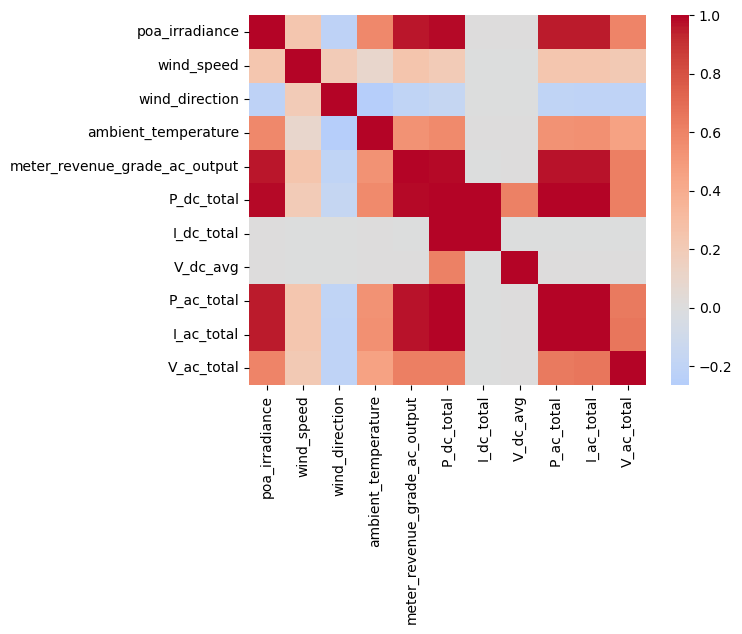

In [21]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)

<Axes: xlabel='hour'>

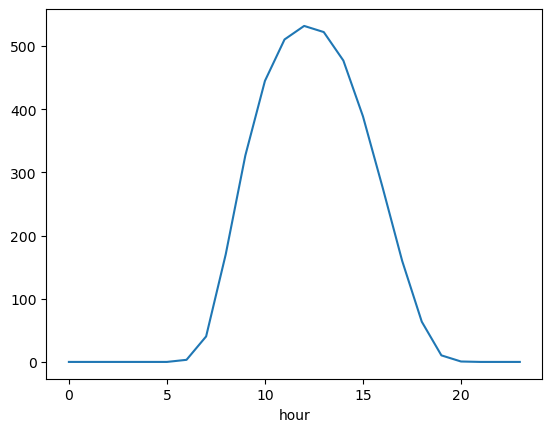

In [22]:
df["hour"] = df["measured_on"].dt.hour
df.groupby("hour")["P_ac_total"].mean().plot()

<Axes: xlabel='poa_irradiance', ylabel='P_ac_total'>

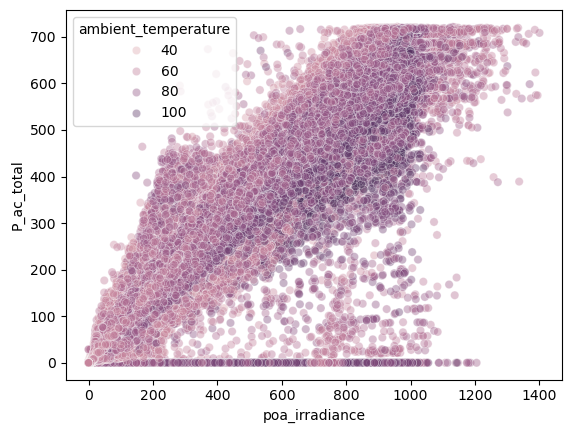

In [23]:
sns.scatterplot(
    data=df,
    x="poa_irradiance",
    y="P_ac_total",
    hue="ambient_temperature",
    alpha=0.4
)


<Axes: xlabel='hour', ylabel='date'>

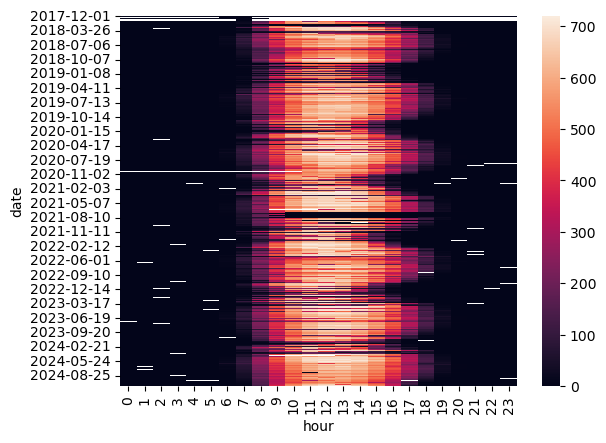

In [24]:
df["date"] = df["measured_on"].dt.date
df["hour"] = df["measured_on"].dt.hour
pivot = df.pivot_table(values="P_ac_total", index="date", columns="hour")
sns.heatmap(pivot)

## Test de Solar Data Tools sur le dataset

In [25]:
# %pip install solar-data-tools

In [26]:
df.dtypes

measured_on                      datetime64[ns]
poa_irradiance                          float64
wind_speed                              float64
wind_direction                          float64
ambient_temperature                     float64
meter_revenue_grade_ac_output           float64
P_dc_total                              float64
I_dc_total                              float64
V_dc_avg                                float64
P_ac_total                              float64
I_ac_total                              float64
V_ac_total                              float64
hour                                      int32
date                                     object
dtype: object

- P_dc_total : puissance totale côté DC (somme des strings en entrée onduleurs). Baisse anormale à irradiance donnée = signe direct d’ombrage ou défaut PV.
- I_dc_total : courant total côté DC. L’ombre fait chuter le courant (moins de photons) plus vite que la tension, donc sensible aux masquages partiels.
- V_dc_avg : tension moyenne côté DC. L’ombre influe moins la tension que le courant, mais une baisse de tension peut signaler bypass activés ou mismatch fort.


- P_ac_total : puissance totale injectée côté AC. Sert à vérifier si la perte DC se répercute et à distinguer pertes internes onduleur vs ombrage.
- I_ac_total : courant total côté AC. Doit suivre la tendance de P_ac_total; une chute AC sans chute DC peut indiquer limitation/cutdown onduleur ou réseau plutôt qu’ombre.
- V_ac_total : tension totale côté AC. Souvent stable; variations ou chutes AC peuvent indiquer problèmes réseau/onduler plutôt que l’ombre.

In [27]:
from solardatatools import DataHandler

df = df.set_index('measured_on')

dh=DataHandler(df)

dh.run_pipeline(power_col='P_ac_total')


            *********************************************
            * Solar Data Tools Data Onboarding Pipeline *
            *********************************************

            This pipeline runs a series of preprocessing, cleaning, and quality
            control tasks on stand-alone PV power or irradiance time series data.
            After the pipeline is run, the data may be plotted, filtered, or
            further analyzed.

            Authors: Bennet Meyers and Sara Miskovich, SLAC

            (Tip: if you have a mosek [https://www.mosek.com/] license and have it
            installed on your system, try setting solver='MOSEK' for a speedup)

            This material is based upon work supported by the U.S. Department
            of Energy's Office of Energy Efficiency and Renewable Energy (EERE)
            under the Solar Energy Technologies Office Award Number 38529.

            


task list:   0%|                                          | 0/7 [00:00<?, ?it/s]

CAUTION: Multiple scan rates detected!
Scan rates (in seconds): [900, 1800]
0 transitions detected.
Suggest splitting data set between:




task list: 100%|██████████████████████████████████| 7/7 [01:03<00:00,  9.11s/it]



total time: 63.81 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              18.09s
Cleaning                   0.81s
Filtering/Summarizing      44.91s
    Data quality           0.69s
    Clear day detect       1.20s
    Clipping detect        21.95s
    Capacity change detect 21.07s



In [28]:
print(dh.report())


-----------------
DATA SET REPORT
-----------------
length               6.93 years
capacity estimate    0.65 kW
data sampling        15 minutes
quality score        0.90
clearness score      0.40
inverter clipping    True
clipped fraction     0.07
capacity changes     False
data quality warning True
time shift errors    False
time zone errors     False
            
None


In [29]:
#dh.plot_daily_energy
#dh.plot_heatmap

In [30]:
#dh.run_loss_factor_analysis()

In [31]:
#dh.loss_analysis.plot_pie

In [32]:
#dh.loss_analysis.plot_decomposition

In [33]:
# samples_per_day = 96  # 15-min intervals

# # Group by day
# daily_groups = df['total_ac_power'].resample('D')

# # Create matrix
# matrix = np.array([day.values for day in daily_groups if len(day) == samples_per_day])
# print(matrix.shape)

(CVXPY) Dec 06 05:00:11 PM: Your problem has 36378 variables, 59742 constraints, and 1536 parameters.
(CVXPY) Dec 06 05:00:11 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 06 05:00:11 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Dec 06 05:00:11 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Dec 06 05:00:11 PM: Compiling problem (target solver=CLARABEL).
(CVXPY) Dec 06 05:00:11 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> CLARABEL
(CVXPY) Dec 06 05:00:11 PM: Applying reduction Dcp2Cone
(CVXPY) Dec 06 05:00:11 PM: Applying reduction CvxAttr2Constr
(CVXPY) Dec 06 05:00:11 PM: Applying reduction ConeMatrixStuffing


                                     CVXPY                                     
                                     v1.7.5                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------


(CVXPY) Dec 06 05:00:12 PM: Applying reduction CLARABEL
(CVXPY) Dec 06 05:00:12 PM: Finished problem compilation (took 8.597e-01 seconds).
(CVXPY) Dec 06 05:00:12 PM: (Subsequent compilations of this problem, using the same arguments, should take less time.)
(CVXPY) Dec 06 05:00:12 PM: Invoking solver CLARABEL  to obtain a solution.


-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
-------------------------------------------------------------
           Clarabel.rs v0.11.1  -  Clever Acronym                

                   (c) Paul Goulart                          
                University of Oxford, 2022                   
-------------------------------------------------------------

problem:
  variables     = 95420
  constraints   = 130816
  nnz(P)        = 47010
  nnz(A)        = 451302
  cones (total) = 2
    :        Zero = 1,  numel = 71168
    : Nonnegative = 1,  numel = 59648

settings:
  linear algebra: direct / faer, precision: 64 bit (12 threads)
  max iter = 200, time limit = Inf,  max step = 0.990
  tol_feas = 1.0e-8, tol_gap_abs = 1.0e-8, tol_gap_rel = 1.0e-8,
  static reg : on, ϵ1 = 1.0e-8, ϵ2 = 4.9e-32
  

c:\Users\masur\anaconda3\Lib\site-packages\cvxpy\problems\problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
(CVXPY) Dec 06 05:05:32 PM: Problem status: optimal_inaccurate
(CVXPY) Dec 06 05:05:32 PM: Optimal value: 8.999e+02
(CVXPY) Dec 06 05:05:32 PM: Compilation took 8.597e-01 seconds
(CVXPY) Dec 06 05:05:32 PM: Solver (including time spent in interface) took 3.200e+02 seconds


200  +8.9990e+02  +8.9990e+02  1.27e-08  1.13e-08  1.19e-14  2.31e-11  3.86e-12  5.15e-01  
---------------------------------------------------------------------------------------------
Terminated with status = AlmostSolved
solve time = 319.7691464s
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
True
component arg must be one of ['clear', 'shade', 'residual']


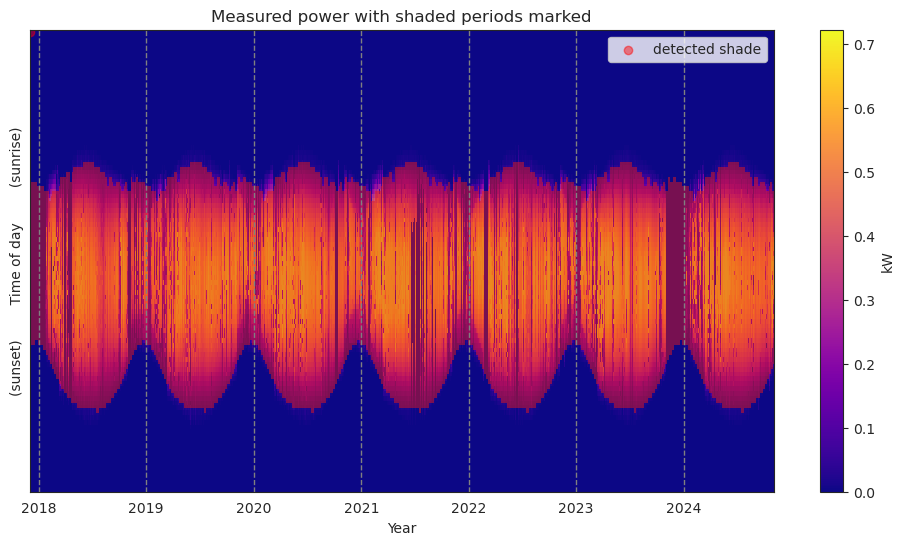

In [34]:
from solardatatools.algorithms.shade import ShadeAnalysis

shade = ShadeAnalysis(data_handler=dh, matrix=None)

# Run the shading detection
shade.run(power=8, solver='CLARABEL', verbose=True)

# Check if the analysis ran
print(shade.has_run)  # True if completed

# Plot heatmap of shading anomalies
shade.plot_annotated_heatmap(figsize=(12,6))

# component analysis
shade.plot_component('shading')

In [38]:
def inspect_df(df):
    info = pd.DataFrame({
        "dtype": df.dtypes,
        "nb_valeurs": df.count(),
        "nb_na": df.isna().sum(),
        "pct_na": df.isna().mean() * 100,
        "nb_zero": (df == 0).sum(numeric_only=False),
        "pct_zero": (df == 0).mean(numeric_only=False) * 100
    })

    def etat_col(pct):
        if pct == 100:
            return "vide"
        elif pct == 0:
            return "pleine"
        else:
            return "partielle"

    info["etat"] = info["pct_na"].apply(etat_col)

    return info

# Exemple d'utilisation
result = inspect_df(df)
print(result)

'''
nb_na → nombre de valeurs manquantes

pct_na → pourcentage de valeurs manquantes

nb_zero → nombre de valeurs égales à 0

pct_zero → pourcentage de valeurs égales à 0

etat → colonne vide / pleine / partielle
'''

                                 dtype  nb_valeurs   nb_na     pct_na  \
poa_irradiance                 float64      199711       0   0.000000   
wind_speed                     float64      199695      16   0.008012   
wind_direction                 float64      199703       8   0.004006   
ambient_temperature            float64      199580     131   0.065595   
meter_revenue_grade_ac_output  float64      199711       0   0.000000   
P_dc_total                     float64       24391  175320  87.786852   
I_dc_total                     float64      199711       0   0.000000   
V_dc_avg                       float64      199711       0   0.000000   
P_ac_total                     float64      199711       0   0.000000   
I_ac_total                     float64      199711       0   0.000000   
V_ac_total                     float64      199711       0   0.000000   
hour                             int32      199711       0   0.000000   
date                            object      199711 